In [1]:
# Import Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
## Numpy
## Pandas
## Matplotlib
## Scikit-learn:train_test_split
### 
## Statsmodels
from sklearn.linear_model import lasso_path,lars_path
from sklearn.linear_model import Ridge, Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn import preprocessing

## Instructions- this question carries total  50 marks

In [ ]:
# Read the description of Air Quality dataset in the file: 
# UCI Machine Learning Repository_ Air Quality Data Set.pdf

# Use either of Temperature, Relative Humidity or Absolute Humidity as the target variable 
# and the rest as predictors (except Date and Time - the first two columns).

### Q1 Read the Data

In [6]:
data = pd.read_csv('AirQualityUCI_copy.csv')

# Output the data snippet here.
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10/03/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10/03/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10/03/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10/03/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,04/04/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,04/04/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,04/04/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


In [ ]:
######################################

In [31]:
df = data.drop(['Date', 'Time'],axis = 1)
y = df['T']
df2=df.drop('T',axis= 1)

### Q2 Analyze the correlation between the predictors

In [9]:
# Print the correlation matrix here ()
cor_matrix = df2.corr()
cor_matrix

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH
CO(GT),1.000000,0.041411,0.128351,-0.031378,0.029926,0.526451,-0.089981,0.671127,-0.073724,0.080310,-0.048227,-0.045892
PT08.S1(CO),0.041411,1.000000,0.170007,0.852687,0.933102,0.277993,0.087019,0.154030,0.845149,0.892434,0.745375,0.764903
NMHC(GT),0.128351,0.170007,1.000000,0.037323,0.110104,-0.004427,0.048821,0.103307,0.162680,0.101185,0.008284,0.012500
C6H6(GT),-0.031378,0.852687,0.037323,1.000000,0.767433,-0.001174,0.512193,-0.010992,0.774673,0.641334,0.925062,0.984555
PT08.S2(NMHC),0.029926,0.933102,0.110104,0.767433,1.000000,0.331272,-0.073667,0.176488,0.874782,0.909905,0.585803,0.646572
NOx(GT),0.526451,0.277993,-0.004427,-0.001174,0.331272,1.000000,-0.436084,0.817139,0.035546,0.461889,-0.053009,-0.095847
PT08.S3(NOx),-0.089981,0.087019,0.048821,0.512193,-0.073667,-0.436084,1.000000,-0.256232,0.122734,-0.208865,0.573549,0.621618
NO2(GT),0.671127,0.154030,0.103307,-0.010992,0.176488,0.817139,-0.256232,1.000000,-0.022174,0.253439,-0.081305,-0.060440
PT08.S4(NO2),-0.073724,0.845149,0.162680,0.774673,0.874782,0.035546,0.122734,-0.022174,1.000000,0.723690,0.640707,0.691913
PT08.S5(O3),0.080310,0.892434,0.101185,0.641334,0.909905,0.461889,-0.208865,0.253439,0.723690,1.000000,0.524955,0.519467


In [32]:
# Drop the variables which have correlation more than 0.95. How many are dropped?
def cor_set(d,t):
    col_corr = set()
    corr_m = d.corr()
    for i in range(len(corr_m.columns)):
        for j in range(i):
            if (corr_m.iloc[i,j]>= t) or (corr_m.iloc[i,j]< -t) and (corr_m.columns[j] not in col_corr):
                colname = corr_m.columns[i]
                col_corr.add(colname)
                if colname in d.columns:
                    del d[colname]
    print(d.info())


###################    
cor_set(df2,0.95)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   int64  
 2   NMHC(GT)       9357 non-null   int64  
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   int64  
 5   NOx(GT)        9357 non-null   int64  
 6   PT08.S3(NOx)   9357 non-null   int64  
 7   NO2(GT)        9357 non-null   int64  
 8   PT08.S4(NO2)   9357 non-null   int64  
 9   PT08.S5(O3)    9357 non-null   int64  
 10  RH             9357 non-null   float64
dtypes: float64(3), int64(8)
memory usage: 804.2 KB
None


In [35]:
X = df2

In [36]:
# After dropping the variables find the VIF of the remaining predictors. How many have VIF less than 10?

{X.columns[i]:variance_inflation_factor(X.values,i) for i in range (1,X.shape[1])}

{'PT08.S1(CO)': 184.88274478076434,
 'NMHC(GT)': 2.4571954621466556,
 'C6H6(GT)': 10.479730422581126,
 'PT08.S2(NMHC)': 219.8877334345621,
 'NOx(GT)': 8.357052154960577,
 'PT08.S3(NOx)': 13.275137473142488,
 'NO2(GT)': 5.490952574221537,
 'PT08.S4(NO2)': 73.28091965001896,
 'PT08.S5(O3)': 60.744995269581786,
 'RH': 20.866748269832176}

In [ ]:
# Three columns has VIF less than 10

### Q3 Split the Data - 80:20

In [11]:
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
# Print the shape of the training and testing set
print('shape of x_train = ',x_train.shape)
print('shape of y_train = ',y_train.shape)
print('shape of x_test = ',x_test.shape)
print('shape of y_test = ',y_test.shape)

shape of x_train =  (7485, 10)
shape of y_train =  (7485,)
shape of x_test =  (1872, 10)
shape of y_test =  (1872,)


### Batch GD

In [14]:
class Regressor():
    def __init__(self, learning_rate=1e-1, tol=1e-2, seed=None, normalize=False):
        self.W = None                # Weight matrix
        self.b = None                # Bias Term
        self.__lr = learning_rate    # Learning Rate
        self.__tol = tol             # Tolerance for stopping criteria
        self.__length = None         # Number of predictors
        self.__normalize = normalize # Normalize the data
        self.__m = None              # Number of examples
        self.__costs = []            # List to store the loss values
        self.__iterations = []       # List to store the iteration points
        self.ws = []               # List to store the weights 
        self.bs = []               # List to store the bias terms
        
        
    def __initialize_weights_and_bias(self):
        self.W = np.random.randn(self.__length) #(n,1) - Initializes randomly the weights 
        self.b = 0                              # Initializes the bias term to 0
        self.ws.append(self.W)               
        self.bs.append(self.b)

    def __computeCost(self,h,Y):
        loss = np.square(h-Y)                   # (y_true - y_pred)^2
        cost = np.sum(loss)/(2*self.__m)        # 1/2n sum(y_true - y_pred)^2
        return cost

    def __optimize(self,X,Y):
        h = np.dot(X,self.W)+self.b             # Predicted values of the target variable
        dW = np.dot( X.T, (h-Y) ) / self.__m    # Derivative with respect to the weights
        db = np.sum( h-Y )  / self.__m          # Derivative with respect to the bias terms
        self.W = self.W - self.__lr*dW          # Update the weights using GD
        self.b = self.b - self.__lr*db          # Update the bias terms using GD
        self.ws.append(self.W)                       # Store the weights matrices
        self.bs.append(self.b)                       # Store the bias terms

    def __normalizeX(self,X):return (X-self.__mean) / (self.__std)  # Standardizing the design matrix

    #----------------------------------#
    #----- Batch Gradient Descent -----#
    #----------------------------------#    
    def fit(self, X, y, verbose=True):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0) # Mean and Variance of the design matrix
            X = self.__normalizeX(X)                                # Normalization
        self.__m, self.__length = X.shape                           # Number of examples, Number of features
        self.__initialize_weights_and_bias()                        # Initialize the weights
        last_cost,i = float('inf'),0                                # Initialize the loss and iteration number
        while True:
            h = np.dot(X,self.W)+self.b                             # Predicted values of the target variable
            cost = self.__computeCost(h,y)                          # Compute the cost for the predictions
            if verbose: print(f"Iteration: {i}, Cost: {cost:.3f}")  # Print the iterations
            self.__optimize(X,y)                                    # Calls the optimization algorithm (GD here)
            if last_cost-cost < self.__tol: break                   # Break if converged
            else: last_cost,i = cost,i+1                            # else update
            self.__costs.append(cost)       
            self.__iterations.append(i)

    def predict(self,X):

        if self.__normalize: X = self.__normalizeX(X)               # Function for predictions
        return np.dot(X,self.W)+self.b
    
    #-----------------------------------#
    #--- Sequential Gradient Descent ---#
    #-----------------------------------#    
    def seq_fit(self, X, y, verbose=True):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0) # Mean and Variance of the design matrix
            X = self.__normalizeX(X)                                # Normalization
        self.__m, self.__length = X.shape                           # Number of examples, Number of features
        self.__initialize_weights_and_bias()                        # Initialize the weights
        last_cost,j = float('inf'), 0                               # Initialize the loss and iteration number
        # Initialize the number of iterations to zero here
        
        while True:
            cost=0
            for i in range(len(X)):                                 # Iterate over the data sequentially
                h = np.dot(X.iloc[i, :], self.W)+self.b             # Predicted value of the target variable
                cost += self.__computeCost(h, y.iloc[i])            # Add the loss value
                self.__optimize(X.iloc[i, :], y.iloc[i])            # Call the optimization algorithm (GD here)

            if verbose: print(f"Iteration: {j}, Cost: {cost:.3f}")  # Print the iterations
            #if last_cost-cost < self.__tol: break                   # Break if converges
            last_cost, j = cost, j+1                          # Update the loss and iteration number

            # You may limit the number of iterations here.

            self.__costs.append(cost)                              
            self.__iterations.append(j)     

    def score(self,X,y):
        return 1-(np.sum(((y-self.predict(X))**2))/np.sum((y-np.mean(y))**2))  # Computes the accuracy score

## Q4 Batch Method 

In [15]:
# Show the following:

## 1. Vary the tolerance and plot the loss curve for each tolerance. Label the loss curves properly.
## 2. Remove the missing values in the dataframe: 'data' (values which are equal to -200) and 
##    re-run the batch method. Plot the correspoding loss curve.

batch_regressor = Regressor(normalize=True)

# Call the fit function of the Regressor class on the training set
batch_regressor.fit(x_train, y_train)
# Find the R2 score of the training and testing set
train_score =r2_score(batch_regressor.predict(x_train),y_train) 
test_score = r2_score(batch_regressor.predict(x_test),y_test)

print("Train Score:", train_score)
print("Test Score: ", test_score)
batch_regressor.plot()

Iteration: 0, Cost: 943.798
Iteration: 1, Cost: 504.120
Iteration: 2, Cost: 314.683
Iteration: 3, Cost: 224.216
Iteration: 4, Cost: 176.097
Iteration: 5, Cost: 147.835
Iteration: 6, Cost: 129.805
Iteration: 7, Cost: 117.529
Iteration: 8, Cost: 108.744
Iteration: 9, Cost: 102.213
Iteration: 10, Cost: 97.213
Iteration: 11, Cost: 93.296
Iteration: 12, Cost: 90.169
Iteration: 13, Cost: 87.635
Iteration: 14, Cost: 85.555
Iteration: 15, Cost: 83.826
Iteration: 16, Cost: 82.373
Iteration: 17, Cost: 81.140
Iteration: 18, Cost: 80.082
Iteration: 19, Cost: 79.166
Iteration: 20, Cost: 78.365
Iteration: 21, Cost: 77.658
Iteration: 22, Cost: 77.029
Iteration: 23, Cost: 76.463
Iteration: 24, Cost: 75.951
Iteration: 25, Cost: 75.484
Iteration: 26, Cost: 75.054
Iteration: 27, Cost: 74.657
Iteration: 28, Cost: 74.288
Iteration: 29, Cost: 73.943
Iteration: 30, Cost: 73.618
Iteration: 31, Cost: 73.313
Iteration: 32, Cost: 73.024
Iteration: 33, Cost: 72.750
Iteration: 34, Cost: 72.489
Iteration: 35, Cost:

In [2]:
## 2. Remove the missing values in the dataframe: 'data' (values which are equal to -200) and 
##    re-run the batch method. Plot the correspoding loss curve.


###### NMGHC2 column has -200 values
df[df['NMHC(GT)']!=-200]
y = df['T']
X=df.drop('T',axis= 1)
x_train, x_test, y_train, y_test = train_test_split( X, y,test_size=0.2, random_state=42)


batch_regressor.fit(x_train, y_train)

# Find the R2 score of the training and testing set
train_score =r2_score(batch_regressor.predict(x_train),y_train) 
test_score = r2_score(batch_regressor.predict(x_test),y_test)

print("Train Score:", train_score)
print("Test Score: ", test_score)
batch_regressor.plot()

NameError: name 'df' is not defined

## Q5 Lasso

In [21]:
# Fit lasso regression model on the training set
lasso = Lasso(alpha = 0.8)
lasso.fit(x_train,y_train)
# Find the R2 score of the training and testing set
train_score = r2_score(lasso.predict(x_train),y_train)
test_score = r2_score(lasso.predict(x_test),y_test)

print("Train Score:", train_score)
print("Test Score: ", test_score)

Train Score: 0.9293874869817476
Test Score:  0.9268873418157535


## Q6 Ridge

In [22]:
# Fit ridge regression model on the training set
ridge = Ridge(alpha = 0.8)
ridge.fit(x_train,y_train)
# Find the R2 score of the training and testing set
train_score = r2_score(ridge.predict(x_train),y_train)
test_score = r2_score(ridge.predict(x_test),y_test)

print("Train Score:", train_score)
print("Test Score: ", test_score)

Train Score: 0.929425531801877
Test Score:  0.9269399217362004


## Q7 Interpret the Lasso and Ridge solutions in terms of selection and shrinkage

In [3]:
plt.plot(lasso_coeff)
plt.plot(ridge_coeff)
plt.xticks("")
plt.xlabel("Parameters")
plt.legend(["LASSO","Ridge"])
plt.title("Parameter Values: LASSO vs Rigde")
plt.show()

NameError: name 'lasso_coeff' is not defined

## Q8 Refer to the Lasso Path documentation and plot the lasso path for various value of log(alpha)

In [39]:
alphas = np.arange(0.1,1.1,0.1)
lasso = Lasso(max_iter = 1000)
coefs = []
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(x_train,y_train)
    coefs.append(lasso.coef_)
plt.figure(figsize=(15,10))
ax.plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale('log')
plt.axis('tight')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38452.17427096941, tolerance: 1401.3808150255174
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37501.976956134415, tolerance: 1401.3808150255174
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34243.96309238098, tolerance: 1401.3808150255174
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27213.71

NameError: name 'ax' is not defined

<Figure size 1080x720 with 0 Axes>

## Q9 Refer to the LARS Path documentation and plot the lasso path for various value of log(alpha)

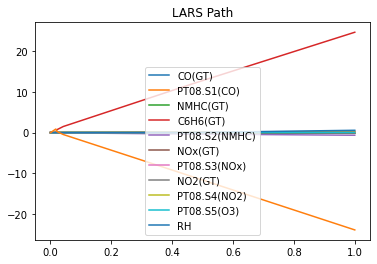

In [44]:
_,_,coefs = lars_path(np.array(x_train),np.array(y_train),method='lar')
xx= np.sum(np.abs(np.matrix(coefs.T)),axis =1)
xx /= xx[-1]
plt.plot(xx,coefs.T)
plt.title("LARS Path")
plt.legend(X.columns,loc = 'best')

## Q10 Compare the 